Strategies for imputting missing values of features
* Ignoring samples with missing values for features 
* Imputing missing values with mean, median, mode values ( For categorial features, the mode is an option, as well as the median for ordinal categoricals)
* Imputing with random selection from non-missing values
* Imputing using INTERPOLATION - filling with nearby observations
* Model based imputation

### Cleaning the Dataset


In [1]:
import pandas as pd
df_org = pd.read_excel('E:\Technolabs\PS\default_of_credit_card_clients.xls')

In [2]:
print(df_org.shape)
print(df_org.isnull().sum())


(30000, 25)
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [3]:
# Boolean indexing to find values with zeros
df_zero_mask = df_org == 0
df_zero_mask

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# Let's find out which rows have values of 0 for all the features
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
feature_zero_mask

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [5]:
sum(feature_zero_mask)

315

In [6]:
# Let's select the rows which don't have missing values
df_clean = df_org.loc[~feature_zero_mask].copy()
df_clean.shape

(29685, 25)

In [7]:
# Let's check the ID's have unique values
df_clean['ID'].nunique()

29685

In [11]:
# Let's replace this values 
df_clean['EDUCATION'].replace(to_replace=[0,5,6],value = 4,inplace=True)
df_clean['MARRIAGE'].replace(to_replace=[0],value = 3,inplace=True)

In [12]:
# Let's see what's the value count of PAY_1 feature look like
let = df_org['PAY_1'] == 0
sum(let)

13402

In [13]:
df_org['PAY_1'].value_counts()

0                13402
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [14]:
# as we can see there are values with Not Available
missing_pay_1_mask = df_clean['PAY_1'] == 'Not available'
sum(missing_pay_1_mask)

3021

In [15]:
# Let's Make a copy of these rows in a new DataFrame which we can add to the data we've been using for modeling
df_missing_pay_1  = df_clean.loc[missing_pay_1_mask,:].copy()
df_missing_pay_1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
17,f0ba5e02-0c0f,320000,1,1,1,49,Not available,0,0,-1,...,70074,5856,195599,10358,10000,75940,20000,195599,50000,0
28,aecb449b-a999,50000,2,3,1,47,Not available,-1,-1,-1,...,2040,30430,257,3415,3421,2044,30430,257,0,0
29,57ea9a1f-cdd5,50000,1,1,2,26,Not available,0,0,0,...,17907,18375,11400,1500,1500,1000,1000,1600,0,0
54,781f3cc2-7ddc,150000,2,1,2,29,Not available,0,0,0,...,26518,21042,16540,1600,1718,1049,1500,2000,5000,0
60,5c00d7e6-a804,500000,2,3,1,28,Not available,0,0,0,...,14937,13827,15571,1516,1300,1000,1000,2000,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29949,4b490335-91ab,280000,1,1,1,39,Not available,0,0,0,...,40939,44290,70573,1652,2144,1666,5015,32013,12,0
29956,b4a99d86-3bdd,150000,1,1,2,30,Not available,0,0,-1,...,1610,1180,2980,2000,2000,2000,1000,3000,0,0
29967,f411fbb3-adaf,50000,1,2,1,32,Not available,0,0,-1,...,50551,40590,39384,2686,0,50551,0,1600,1500,0
29973,31c0c152-e5ac,230000,1,2,1,35,Not available,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1


In [16]:
# Now Let's load our cleaned data set 
df = pd.read_csv('E:\Technolabs\PS\cleaned_final.csv')
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [17]:
# As we know from our Univariate and F-test that important features let's remove the features that we don't want 
features_response = df.columns.tolist()

In [18]:
# columns to remove
items_to_remove = ['ID','SEX','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [19]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

### Mode and Random Imputation of PAY_1


In [20]:
import numpy as np
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(df[features_response[:-1]].values,df['default payment next month'].values,test_size = 0.2, random_state = 24)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 17)
(5333, 17)
(21331,)
(5333,)


In [23]:
df['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [24]:
# To create a imputation value for PAY_1 we need to find the index
features_response[4]

'PAY_1'

In [25]:
# Let's check the median of PAY_1
np.median(X_train[:,4])

0.0

In [26]:
# Let's use random_selection to fill null values
np.random.seed(seed=1)
fill_values = [0,np.random.choice(X_train[:,4], size=(3021,), replace=True)]
fill_values

[0, array([ 0,  0,  0, ...,  2,  0, -2], dtype=int64)]

In [27]:
# To keep track of filling stratagies
fill_strategy = ['mode', 'random']

In [28]:
fill_values[-1]

array([ 0,  0,  0, ...,  2,  0, -2], dtype=int64)

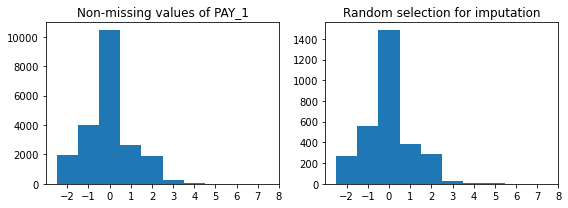

In [29]:
import matplotlib.pyplot as plt #plotting package
%matplotlib inline
fig, axs = plt.subplots(1,2, figsize=(8,3))
bin_edges = np.arange(-2,9)
axs[0].hist(X_train[:,4], bins=bin_edges, align='left')
axs[0].set_xticks(bin_edges)
axs[0].set_title('Non-missing values of PAY_1')
axs[1].hist(fill_values[-1], bins=bin_edges, align='left')
axs[1].set_xticks(bin_edges)
axs[1].set_title('Random selection for imputation')
plt.tight_layout()

In [30]:
from sklearn.model_selection import KFold
k_folds = KFold(n_splits=4, shuffle=True, random_state=1)

In [31]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [32]:
# Let's use the hyperparameters that we have found
rf = RandomForestClassifier(
    n_estimators=200, criterion='gini', max_depth=9,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=1, warm_start=False, class_weight=None)

In [33]:
# Let's loop a missing value and non-missing values of PAY_1 feature
for counter in range(len(fill_values)):
    # Make a copy of missing values and fill this with imputation strategy
    df_fill_pay_1_filled = df_missing_pay_1.copy()
    df_fill_pay_1_filled['PAY_1'] = fill_values[counter]
    
    # Let's split the imputed data into train test split 
    X_fill_pay_1_train,X_fill_pay_1_test,y_fill_pay_1_train,y_fill_pay_1_test = train_test_split(
                            df_fill_pay_1_filled[features_response[:-1]].values,
                            df_fill_pay_1_filled['default payment next month'].values,
                            test_size = 0.2,random_state = 24)
    #Concatenate the imputed data with the array of non-missing data
    X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
    y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
    
    #Use the KFolds splitter and the random forest model to get
    #4-fold cross-validation scores for both imputation methods
    imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
        cv=k_folds, n_jobs=-1, verbose=1,
        return_train_score=True, return_estimator=True,
        error_score='raise-deprecating')
 
    test_score = imputation_compare_cv['test_score']
    print(fill_strategy[counter] + ' imputation: ' +
          'mean testing score ' + str(np.mean(test_score)) +
          ', std ' + str(np.std(test_score)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   18.9s remaining:   18.9s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   19.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


mode imputation: mean testing score 0.772866246168149, std 0.0031479941297533737
random imputation: mean testing score 0.7692540439833129, std 0.003660875187678248


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   14.7s remaining:   14.7s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.8s finished


### A Predictive Model for PAY_1

Model Based Imputation

In [34]:
pay_1_df = df.copy()
pay_1_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [35]:
features_for_imputation = pay_1_df.columns.tolist()

In [36]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university', 'default payment next month', 'PAY_1']

In [37]:
features_for_imputation = [item for item in features_for_imputation if item not in items_to_remove]
features_for_imputation

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

### Building a Multiclass Classification Model for Imputation

In [38]:
X_impute_train,X_impute_test,y_impute_train,y_impute_test = train_test_split(
                            pay_1_df[features_for_imputation].values,
                            pay_1_df['PAY_1'].values,
                            test_size=0.2,random_state=24)

In [39]:
# PAY_1 as response variable
# Select the grid of parameters 
rf_impute_params = {'max_depth':[3,6,9,12],
                   'n_estimators':[10,50,100,200]}

In [40]:
from sklearn.model_selection import GridSearchCV
cv_rf_impute = GridSearchCV(rf,param_grid=rf_impute_params,scoring='accuracy',n_jobs=-1,iid=False,refit=True,
                           cv=4,verbose=2,error_score=np.nan,return_train_score=True)

In [41]:
cv_rf_impute.fit(X_impute_train,y_impute_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.8s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=9,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False, random_state=4,
                                              verbose=1, warm_start=False),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12],

In [42]:
cv_rf_impute.best_params_

{'max_depth': 12, 'n_estimators': 100}

In [43]:
cv_rf_impute.best_score_

0.7337676389523727

In [44]:
pay_1_value_counts = pay_1_df['PAY_1'].value_counts().sort_index()
pay_1_value_counts

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [45]:
pay_1_value_counts/pay_1_value_counts.sum()

-2    0.092859
-1    0.189281
 0    0.490812
 1    0.122300
 2    0.089184
 3    0.010951
 4    0.002363
 5    0.000863
 6    0.000413
 7    0.000338
 8    0.000638
Name: PAY_1, dtype: float64

In [46]:
# Let's check the accuracy of model based imputation
y_impute_predict = cv_rf_impute.predict(X_impute_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [47]:
from sklearn import metrics
metrics.accuracy_score(y_impute_test,y_impute_predict)

0.7387961747609225

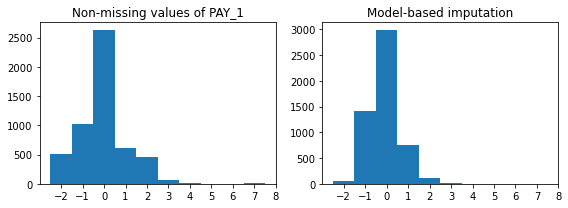

In [48]:
# Visualize the actual values and predicted values
fig, axs = plt.subplots(1,2, figsize=(8,3))
axs[0].hist(y_impute_test, bins=bin_edges, align='left')
axs[0].set_xticks(bin_edges)
axs[0].set_title('Non-missing values of PAY_1')
axs[1].hist(y_impute_predict, bins=bin_edges, align='left')
axs[1].set_xticks(bin_edges)
axs[1].set_title('Model-based imputation')
plt.tight_layout()

In [49]:
X_impute_all = pay_1_df[features_for_imputation].values
y_impute_all = pay_1_df['PAY_1'].values

In [50]:
rf_impute = RandomForestClassifier(n_estimators = 100, max_depth = 12)

In [51]:
rf_impute.fit(X_impute_all,y_impute_all)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Using the Imputation Model and Comparing it to Other Methods

In [52]:
# Let's take a dataframe of missing values and copy
df_fill_pay_1_model = df_missing_pay_1.copy()
df_fill_pay_1_model['PAY_1'].head()

17    Not available
28    Not available
29    Not available
54    Not available
60    Not available
Name: PAY_1, dtype: object

In [53]:
# Now fill these missing values with imputed predicted values
df_fill_pay_1_model['PAY_1'] = rf_impute.predict(df_fill_pay_1_model[features_for_imputation].values)

In [54]:
df_fill_pay_1_model['PAY_1'].head()

17    0
28   -1
29    0
54    0
60    0
Name: PAY_1, dtype: int64

In [55]:
df_fill_pay_1_model['PAY_1'].value_counts().sort_index()

-2      30
-1     763
 0    1715
 1     438
 2      64
 3       7
 4       2
 6       1
 8       1
Name: PAY_1, dtype: int64

In [56]:
# Splitting the imputed data as follows
X_fill_pay_1_train,X_fill_pay_1_test,y_fill_pay_1_train,y_fill_pay_1_test = train_test_split(
                    df_fill_pay_1_model[features_response[:-1]].values,
                    df_fill_pay_1_model['default payment next month'].values,
                    test_size=0.2,random_state=24)

In [57]:
# concatenate with the original dataset with pay_1
X_train_all = np.concatenate((X_train,X_fill_pay_1_train),axis=0)
y_train_all = np.concatenate((y_train,y_fill_pay_1_train),axis=0)

In [58]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=4, verbose=1,
                       warm_start=False)

The rf object holds a random forest classifier with 200 trees and maximum depth of 9, as expected. Now, use this model with the combined imputed and non-missing training data in cross-validation as we did with the other imputation methods, to test model-based imputation

In [59]:
imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
cv=k_folds, n_jobs=-1, verbose=1,
    return_train_score=True, return_estimator=True,
    error_score='raise-deprecating')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   15.1s remaining:   15.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   15.2s finished


In [60]:
np.mean(imputation_compare_cv['test_score'])

0.7726757126815554

reassign the filled values using imputation with the mode of 0

In [61]:
df_fill_pay_1_model['PAY_1'] = np.zeros_like(df_fill_pay_1_model['PAY_1'].values)

In [62]:
df_fill_pay_1_model['PAY_1'].unique()

array([0], dtype=int64)

There should only be 0 values present from the mode-based imputation, and we can see in the output that this has worked, since there is only 1 unique value for PAY_1 and it is 0. Now, we repeat the splitting of the imputed data

In [63]:
X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
train_test_split(
    df_fill_pay_1_model[features_response[:-1]].values,
    df_fill_pay_1_model['default payment next month'].values,
test_size=0.2, random_state=24)

In [64]:
# concatenate the values 
X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
X_test_all = np.concatenate((X_test, X_fill_pay_1_test), axis=0)
y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
y_test_all = np.concatenate((y_test, y_fill_pay_1_test), axis=0)

In [65]:
print(X_train_all.shape)
print(X_test_all.shape)
print(y_train_all.shape)
print(y_test_all.shape)

(23747, 17)
(5938, 17)
(23747,)
(5938,)


In [66]:
imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
cv=k_folds, n_jobs=-1, verbose=1,
    return_train_score=True, return_estimator=True,
    error_score='raise-deprecating')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   16.1s remaining:   16.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   16.2s finished


In [67]:
np.mean(imputation_compare_cv['test_score'])

0.772866246168149

### Confirming Model Performance on the Unseen Test Set

In [68]:
rf.fit(X_train_all, y_train_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   11.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=4, verbose=1,
                       warm_start=False)

In [69]:
# Let's check the predicted probabilities
y_test_all_predict_proba = rf.predict_proba(X_test_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [70]:
y_test_all_predict_proba.shape

(5938, 2)

In [71]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_all,y_test_all_predict_proba[:,1])

0.7696243835824927

### Characterizing Costs and Savings


Create a range of thresholds to calculate expected costs and benefits of counseling with this code

In [72]:
thresholds = np.linspace(0,1,101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [73]:
# Index of the testing data [BILL_AMT]
df[features_response[:-1]].columns[5]

'BILL_AMT1'

In [74]:
# avg bill_amt
savings_per_default = np.mean(X_test_all[:,5])
savings_per_default

51601.7433479286

In [75]:
# Cost for counselling 
cost_per_counselling = 7500

In [76]:
#effectiveness of counselling
effectiveness = 0.70

In [77]:
# Creating a list of empty arrays to hold the results
n_pos_pred = np.empty_like(thresholds)
cost_of_all_counsellings = np.empty_like(thresholds)
n_true_pos = np.empty_like(thresholds)
savings_of_all_counsellings = np.empty_like(thresholds)
savings_based_on_balances = np.empty_like(thresholds)

In [78]:
counter = 0
for threshold in thresholds:
    pos_pred = y_test_all_predict_proba[:,1]>threshold
    # Let's calculate the sum of positive predictions which are greater than threshold
    n_pos_pred[counter] = sum(pos_pred)
    # calculate the cost of all counselings
    cost_of_all_counsellings[counter] = n_pos_pred[counter]*cost_per_counselling
    # True positives
    true_pos = pos_pred & y_test_all.astype(bool)
    n_true_pos[counter] = sum(true_pos)
    savings_of_all_counsellings[counter] = n_true_pos[counter] * savings_per_default * effectiveness
    counter += 1

In [79]:
# Now calculate the total net savings
net_savings = savings_of_all_counsellings-cost_of_all_counsellings

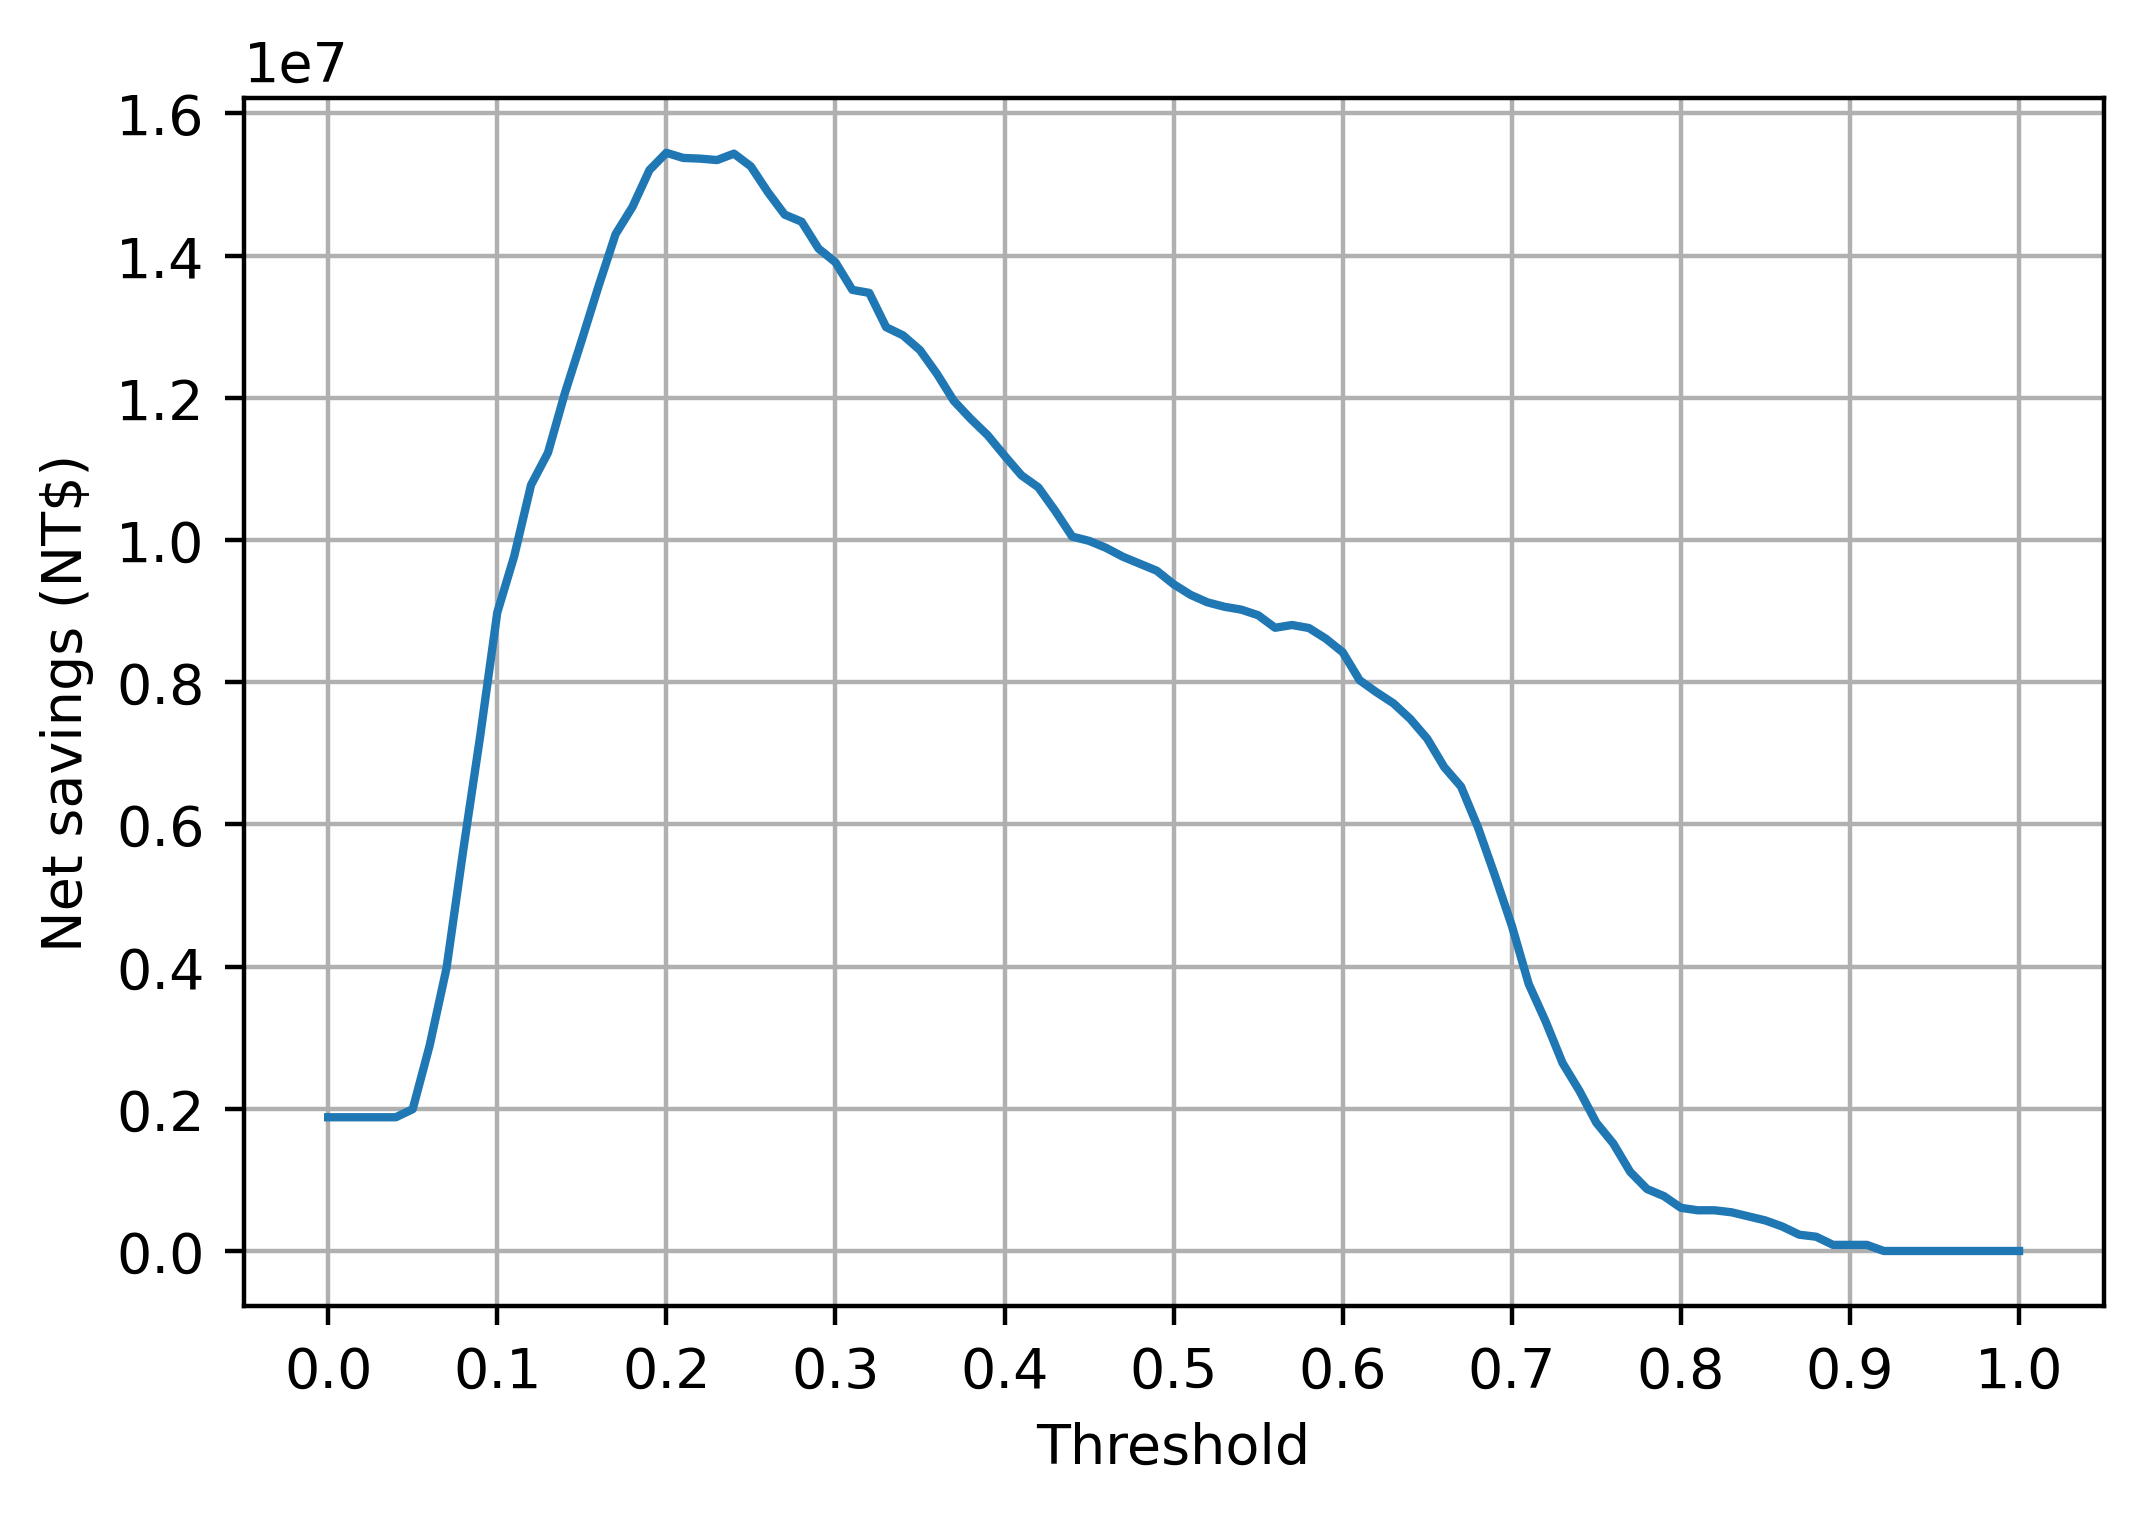

In [80]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
plt.plot(thresholds, net_savings)
plt.xlabel('Threshold')
plt.ylabel('Net savings (NT$)')
plt.xticks(np.linspace(0,1,11))
plt.grid(True)

The highest net savings is obtained by setting thresholds 0.2 to 0.25

In [81]:
# let's see max savings
max_savings_ix = np.argmax(net_savings)
max_savings_ix

20

In [82]:
thresholds[max_savings_ix]

0.2

In [83]:
net_savings[max_savings_ix]

15446325.35991916

Text(0, 0.5, 'Number of accounts')

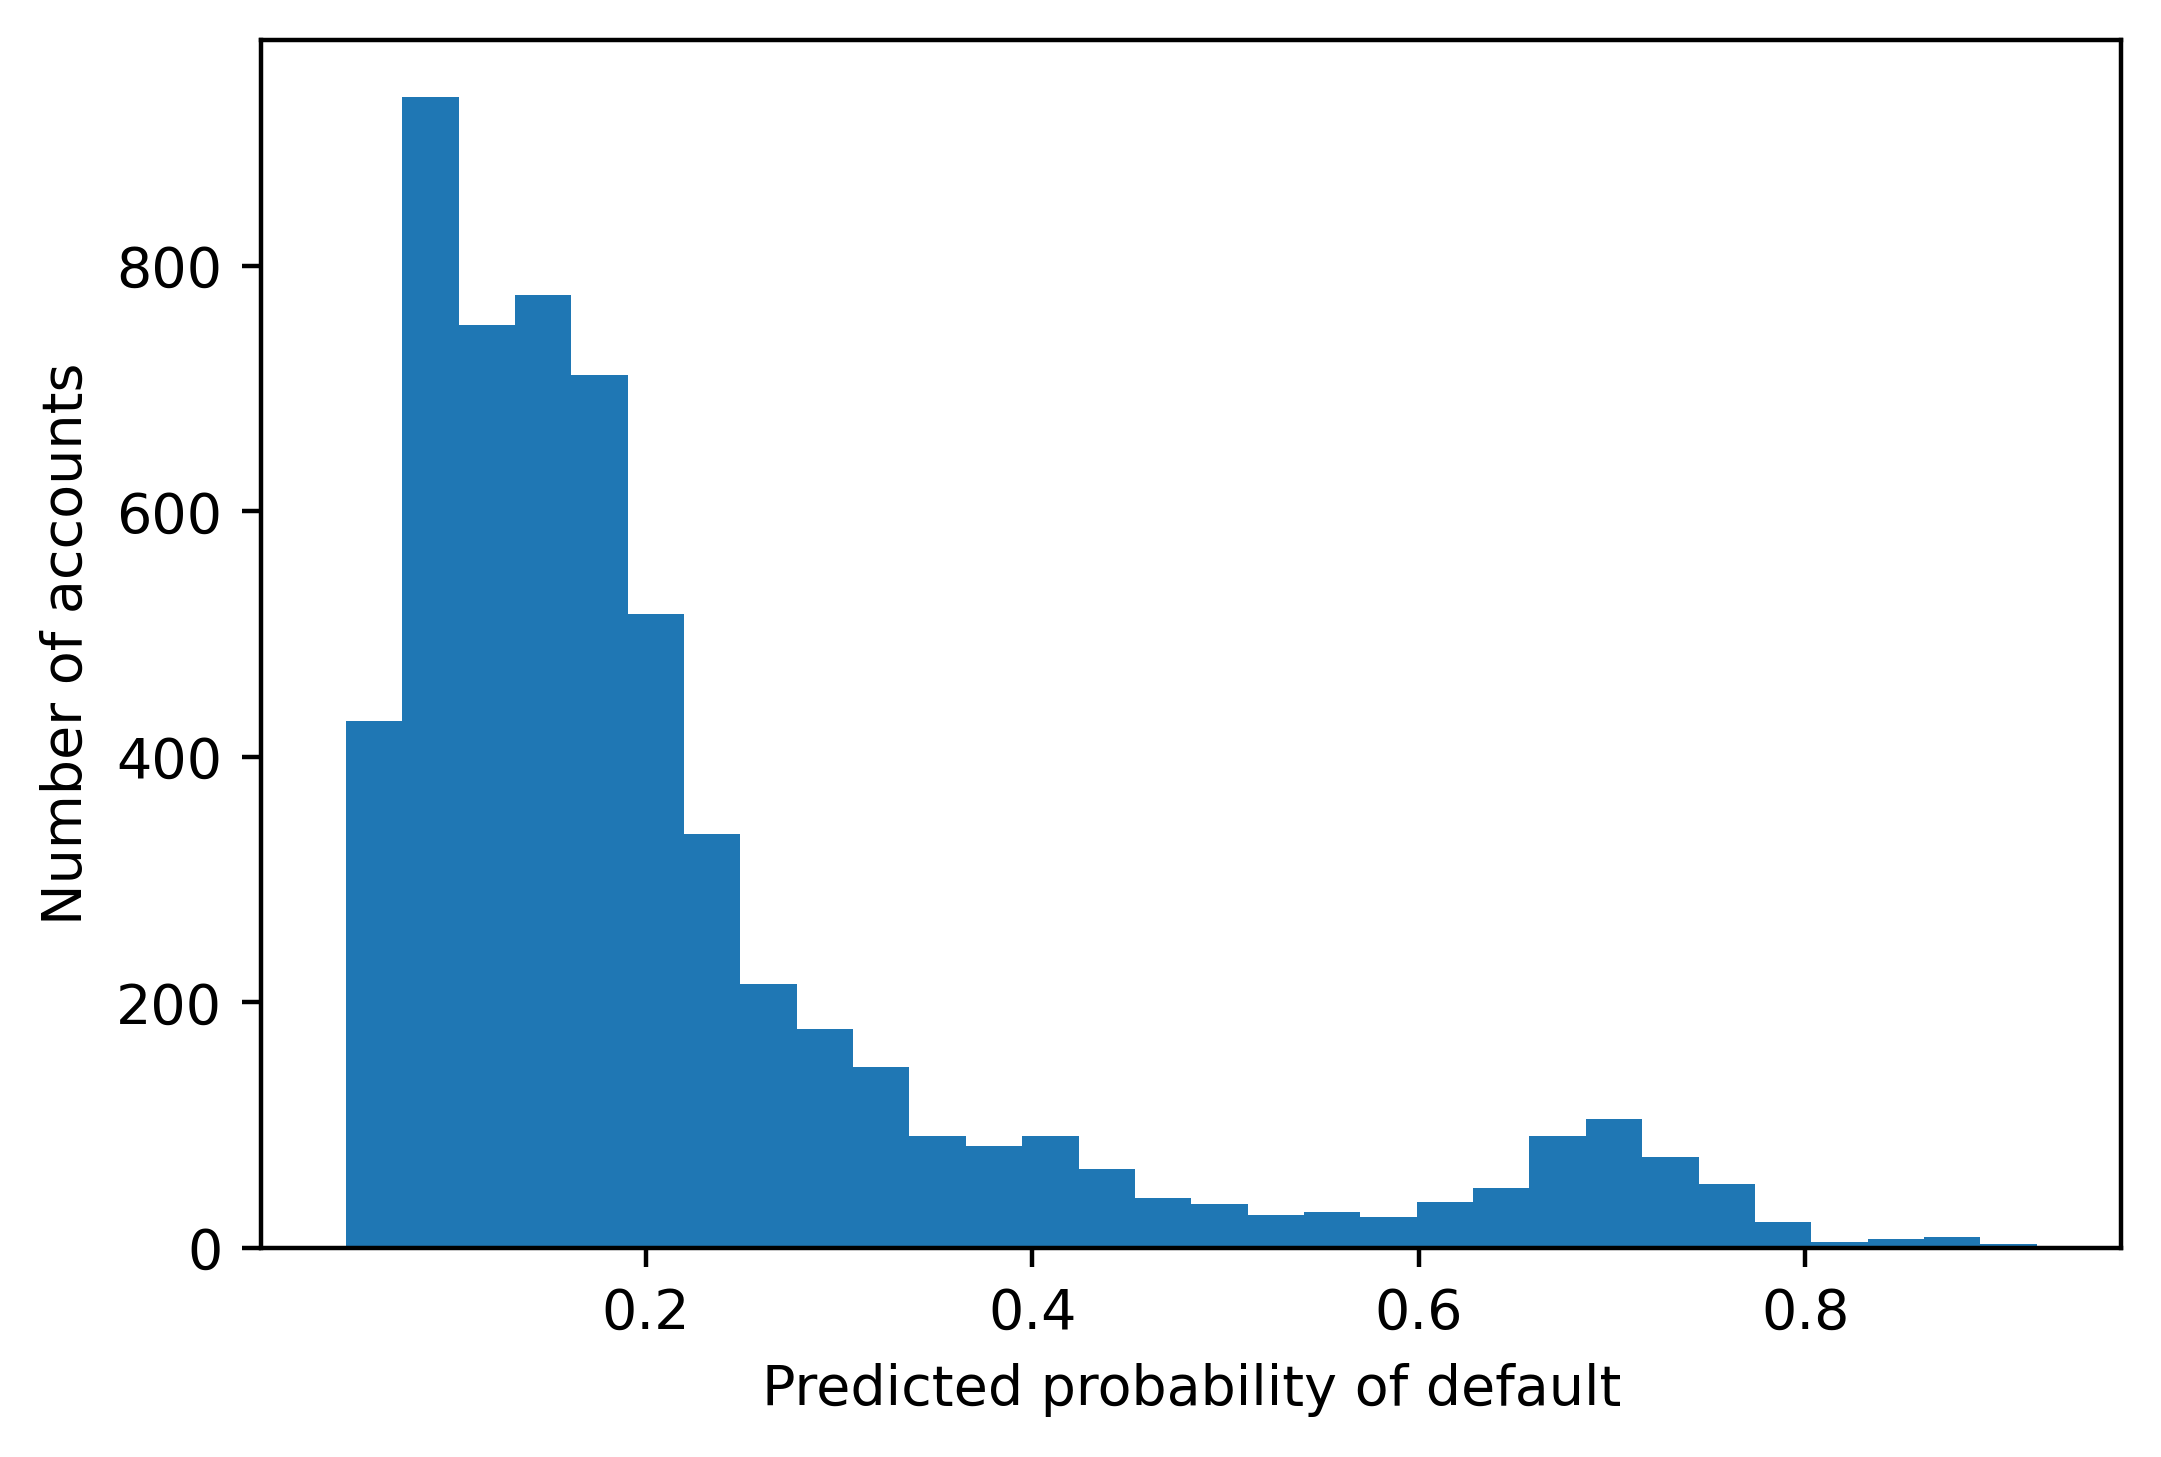

In [84]:
plt.hist(y_test_all_predict_proba[:,1], bins=30)
plt.xlabel('Predicted probability of default')
plt.ylabel('Number of accounts')